# **1.Portfolio problematik**

## **1.3 Tidsserier**


### **1.3.1 Angiv udvælgelseskriterier**

**Trin 1 & 2:**

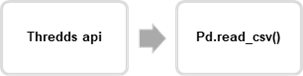

Vi henter værdata fra et API.


```
temp  = pd.read_csv(url) 
```




Prøv å lese url og se om du forstår hva den refererer til.

```
url='https://thredds.ucar.edu/thredds/ncss/grib/NCEP/GFS/Global_0p5deg/best?req=station&var=Apparent_temperature_height_above_ground&&latitude=60.70290856516992&longitude=10.867140671892406&time_start=2020-01-01T12:00:00-05:00&time_duration=PT3H&time_end=2021-02-20T12:00:00-05:00&vertCoord=2&accept=CSV' 

```



In [ ]:
#@title Udetemperature 
import pandas as pd

url='https://thredds.ucar.edu/thredds/ncss/grib/NCEP/GFS/Global_0p5deg/best?req=station&var=Apparent_temperature_height_above_ground&&latitude=60.70290856516992&longitude=10.867140671892406&time_start=2020-01-01T12:00:00-05:00&time_duration=PT3H&time_end=2021-02-20T12:00:00-05:00&vertCoord=2&accept=CSV' #Pressure_reduced_to_MSL_msl Albedo_surface_Mixed_intervals_Average
temp  = pd.read_csv(url) 


,Temperatur (Kelvin)
time,
2021-01-26 00:00:00,257.500092
2021-01-26 03:00:00,257.831085
2021-01-26 06:00:00,257.375549
2021-01-26 09:00:00,257.851257
2021-01-26 12:00:00,261.448730
...,...
2021-02-20 03:00:00,270.100006
2021-02-20 06:00:00,270.027039
2021-02-20 09:00:00,270.090454


**Trin 3**

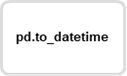


Dernest formatere vi kolonnen "time" i tidsformattet "datetime".

```
temp.time = pd.to_datetime(temp.time, errors='coerce', format='%Y-%m-%d %H:%M:%S')
```





In [ ]:
#@title to_datetime
temp.time = pd.to_datetime(temp.time, errors='coerce', format='%Y-%m-%d %H:%M:%S')


**Trin 4**

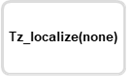


Vi fjerner tidssonen slik at det er lettere å holde styr på.

```
temp.index=pd.to_datetime(temp['time']).dt.tz_localize(None)
```






In [ ]:
#@title fjern tidssone
temp.index=pd.to_datetime(temp['time']).dt.tz_localize(None)

**Trin 5**

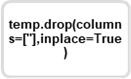

Så fjerner vi også kolonner som vi ikke trenger


```
temp.drop(columns=[''],inplace=True)
```




In [ ]:
#@title fjern kolonner
temp.drop(columns=['time','latitude[unit="degrees_north"]','vertCoord[unit="m"]','longitude[unit="degrees_east"]'],inplace=True)

**Trin 6**

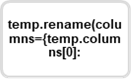


Til sidst omnavngiver vi kolonnen, så den er nem at refere til.


```
temp=temp.rename(columns={temp.columns[0]: "Temperatur (Kelvin)"})
```

In [ ]:
temp=temp.rename(columns={temp.columns[0]: "Temperatur (Kelvin)"})
temp

**Vinn**

Vi følger samme tilnærming som i trinn 1-6.

Nå henter vi data for vinn.

In [ ]:
#@title Vinn 
import pandas as pd

url='https://thredds.ucar.edu/thredds/ncss/grib/NCEP/GFS/Global_0p5deg/best?req=station&var=Wind_speed_gust_surface&latitude=60.70290856516992&longitude=10.867140671892406&time_start=2020-01-01T12:00:00-05:00&time_duration=PT3H&time_end=2021-02-20T12:00:00-05:00&vertCoord=2&accept=CSV' #Pressure_reduced_to_MSL_msl Albedo_surface_Mixed_intervals_Average
wind  = pd.read_csv(url) 

wind.time = pd.to_datetime(wind.time, errors='coerce', format='%Y-%m-%d %H:%M:%S')
wind.index=pd.to_datetime(wind['time']).dt.tz_localize(None)


wind.drop(columns=['time','latitude[unit="degrees_north"]','longitude[unit="degrees_east"]'],inplace=True)
wind=wind.rename(columns={wind.columns[0]: "Vinn (m/s)"})

wind

,Vinn (m/s)
time,
2021-01-26 00:00:00,2.520575
2021-01-26 03:00:00,2.400703
2021-01-26 06:00:00,2.203087
2021-01-26 09:00:00,2.407972
2021-01-26 12:00:00,1.850945
...,...
2021-02-20 03:00:00,13.630651
2021-02-20 06:00:00,14.165317
2021-02-20 09:00:00,13.053370


**Vann i atmosfæren**


Vi følger samme tilnærming som i trinn 1-6.

Nå samler vi inn data for vann i atmosfæren.

In [ ]:
#@title vann i atmosfæren
import pandas as pd

url='https://thredds.ucar.edu/thredds/ncss/grib/NCEP/GFS/Global_0p5deg/best?req=station&var=Precipitable_water_entire_atmosphere_single_layer&&latitude=60.70290856516992&longitude=10.867140671892406&time_start=2020-01-01T12:00:00-05:00&time_duration=PT3H&time_end=2021-02-20T12:00:00-05:00&vertCoord=2&accept=CSV' #Pressure_reduced_to_MSL_msl Albedo_surface_Mixed_intervals_Average
water  = pd.read_csv(url) 


water.time = pd.to_datetime(water.time, errors='coerce', format='%Y-%m-%d %H:%M:%S')
water.index=pd.to_datetime(water['time']).dt.tz_localize(None)

water=water.rename(columns={water.columns[3]: "Vann i atmosfæren (kg/m-2)"})
water.drop(columns=['time','latitude[unit="degrees_north"]','longitude[unit="degrees_east"]'],inplace=True)

water

,Vann i atmosfæren (kg/m-2)
time,
2021-01-26 00:00:00,3.4
2021-01-26 03:00:00,3.1
2021-01-26 06:00:00,2.5
2021-01-26 09:00:00,2.4
2021-01-26 12:00:00,2.8
...,...
2021-02-20 03:00:00,14.5
2021-02-20 06:00:00,15.5
2021-02-20 09:00:00,15.3


### **1.3.2 Vælg tabeller / filer af interesse**

**Trin 7**

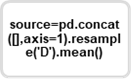





Vi ønsker å slå sammen alle datasett i en stor dataramme.

Vi fletter datasettene med

```
source=pd.concat([''],axis=1)
```

Vi sampler data på daglig nivå i stedet for hver tredje time


```
.resample('D').mean() 
```







In [ ]:
#@title sammenføre data
source=pd.concat([wind, temp, water],axis=1).resample('D').mean() #.resample('3H').interpolate(method='linear', limit_direction='both') #
source['time']=source.index
source.head()

,Vinn (m/s),Temperatur (Kelvin),Vann i atmosfæren (kg/m-2),time
time,,,,
2021-01-26,2.081133,258.663719,2.862500,2021-01-26
2021-01-27,2.472910,258.618145,4.034784,2021-01-27
2021-01-28,1.745940,258.533159,3.501597,2021-01-28
2021-01-29,0.953865,257.752342,2.914311,2021-01-29
2021-01-30,2.237133,257.139603,3.558492,2021-01-30


### **1.3.3 Vælg data i en tabel / fil**

Nå er vi klare til å se den nye datarammen vår.

Vi bruker biblioteket altair


```
import altair as alt
```


Dette er prinsippet:
```
alt.Chart(source.dropna()).mark_line().transform_fold(list(source.columns.drop('time'))).encode(
    x='time:T',
    y='value:Q',
)
```

Vi bruker fasettfunksjonen til å vise 3 vertikale grafer


```
.facet(
    row='key:N',
)
```



In [ ]:
#@title vis graf av værdata
import altair as alt

alt.Chart(source.dropna()).mark_line().transform_fold(list(source.columns.drop('time'))).encode(
    x='time:T',
    y='value:Q',
    color='key:N',
    tooltip=['value:Q','key:N']
).properties(
    width=300,
    height=180
).facet(
    row='key:N',
).resolve_scale(y='independent').interactive().properties(title="Lokation: NIBIO Apelsvoll Senter for Presisjonsjordbruk") #.save('tidsserier.html')

alt.FacetChart(...)

**Trin 6**

Hvordan kan vi skape verdie med datasettet? og for hvilken målgruppe?